In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data = pd.read_csv("data/combined_stats.csv")
data.columns

Index(['Unnamed: 0', 'Rk_g', 'Player', 'Age_g', 'Team_g', 'Pos_g', 'G_g',
       'GS_g', 'MP_g', 'FG_g', 'FGA_g', 'FG%_g', '3P_g', '3PA_g', '3P%_g',
       '2P_g', '2PA_g', '2P%_g', 'eFG%_g', 'FT_g', 'FTA_g', 'FT%_g', 'ORB_g',
       'DRB_g', 'TRB_g', 'AST_g', 'STL_g', 'BLK_g', 'TOV_g', 'PF_g', 'PTS_g',
       'Awards_g', ' Rk', 'Pos_per', 'Tm', 'G_per', 'MP_per', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'Player-additional', 'Rk_per', 'Team_per', 'Pos', 'G', 'GS_per', 'MP',
       'FG_per', 'FGA_per', 'FG%_per', '3P_per', '3PA_per', '3P%_per',
       '2P_per', '2PA_per', '2P%_per', 'eFG%_per', 'FT_per', 'FTA_per',
       'FT%_per', 'ORB_per', 'DRB_per', 'TRB_per', 'AST_per', 'STL_per',
       'BLK_per', 'TOV_per', 'PF_per', 'PTS_per', 'Awards_per'],
      dtype='object')

<AxesSubplot: xlabel='Age_g', ylabel='PTS_g'>

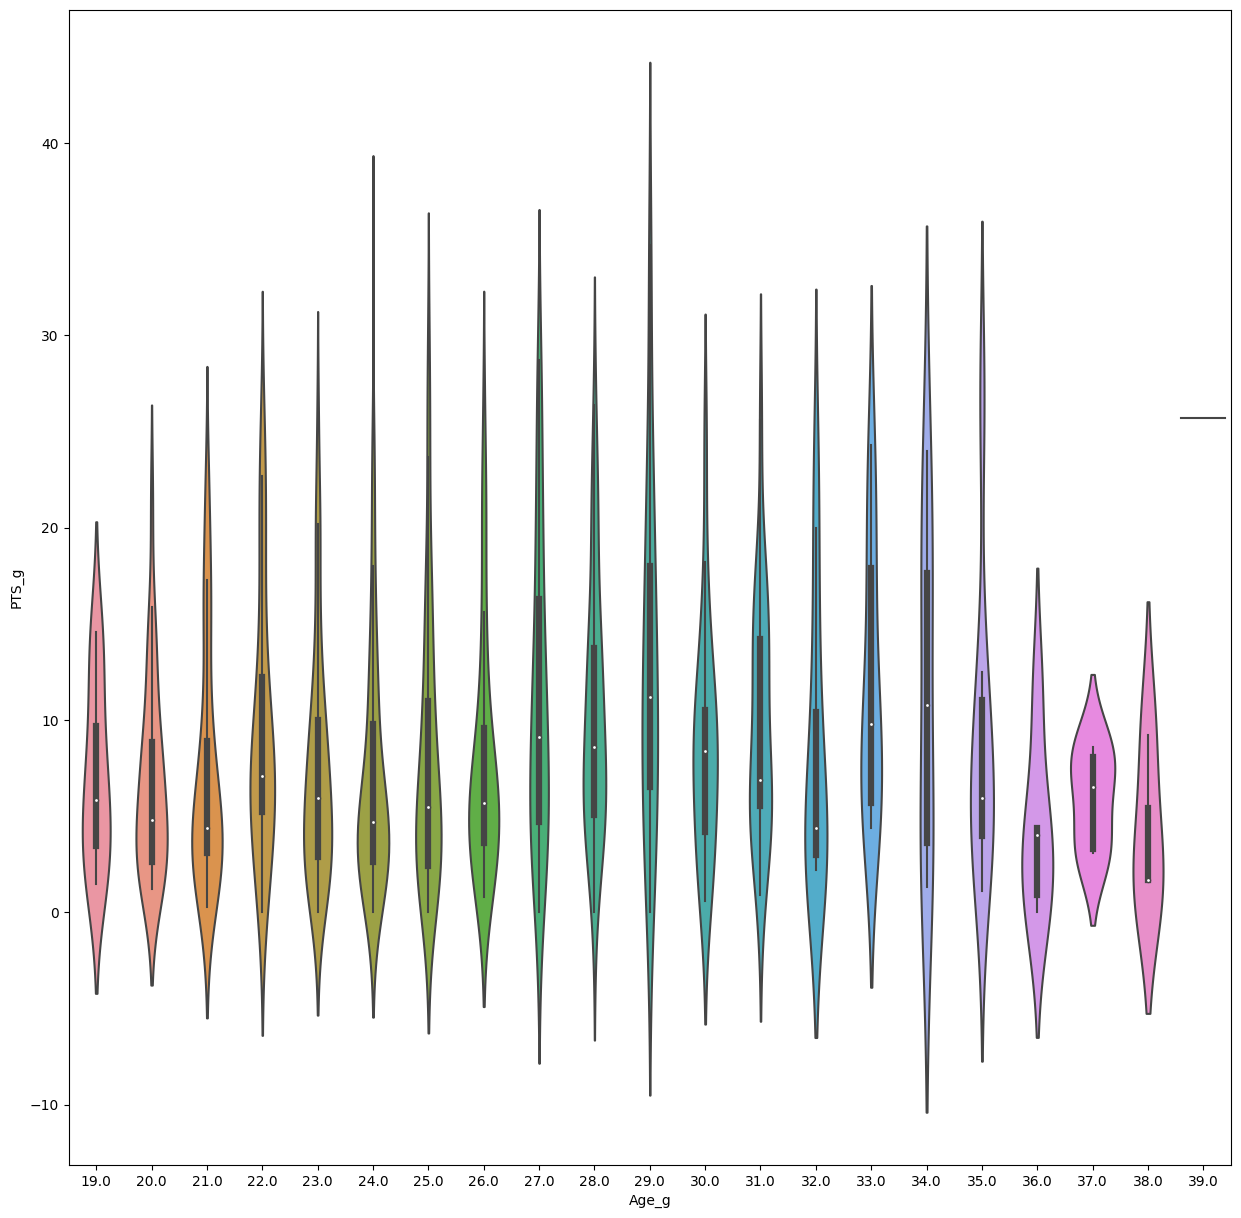

In [9]:
plt.figure(figsize=(15,15))
sn.violinplot(data=data, x='Age_g', y='PTS_g')